<a href="https://colab.research.google.com/github/BrunoASNascimento/nlp_study/blob/develop/pln_ufabc/PLN_Atividade_Pr%C3%A1tica_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processamento de Linguagem Natural [2021.Q3]**
Prof. Alexandre Donizeti Alves
----

**Por favor, informe o seu nome e RA:**

---
**Nome**: Bruno Araújo Santros do Nascimento

**RA**: 11201720606

### **ATIVIDADE PRÁTICA 01**
---

Implemente um notebook em Python usando o Google Colab para realizar as tarefas a seguir:

a) Usar o NLTK e o pacote Beautiful Soup para acessar uma página na Web em língua inglesa e extrair o texto de interesse.

b) Realizar a tokenização do texto obtido e verificar quais são os 20 tokens mais frequentes. Faça um gráfico (histograma, gráfico de frequências ou até mesmo uma nuvem de palavras) mostrando o resultado.



Veja alguns exemplos:

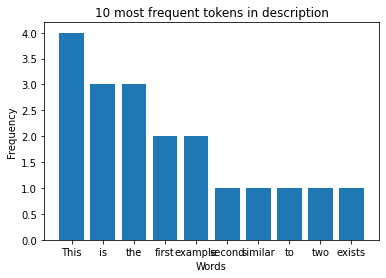

In [1]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "description": [
        "This is the first example",
        "This is the second example",
        "This is similar to the first two",
        "This exists add more words"
    ]
}

df = pd.DataFrame(data)

description_list = df['description'].values.tolist()

# Assign the Counter instance `most_common` call to a variable:
word_frequency = Counter(" ".join(description_list).split()).most_common(10)

# `most_common` returns a list of (word, count) tuples
words = [word for word, _ in word_frequency]
counts = [counts for _, counts in word_frequency]

plt.bar(words, counts)
plt.title("10 most frequent tokens in description")
plt.ylabel("Frequency")
plt.xlabel("Words")
plt.show()

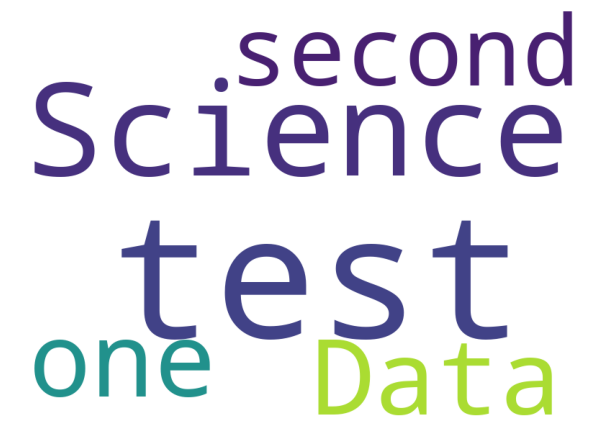

In [2]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = "The Python Science Python Data Python the test one second this is only test this is"

my_stopwords = ["Python"] + list(STOPWORDS)

wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white',
    max_words=50,
    stopwords = my_stopwords,
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Note que mesmo não usando a lista de `stopwords`, algumas palavras não aparecem na nuvem.

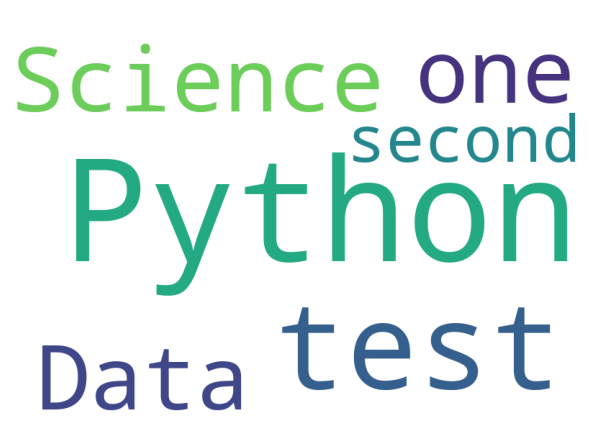

In [3]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = "The Python Science Python Data Python the test one second this is only test this is"

wordcloud = WordCloud(
    width = 800,
    height = 600,
    background_color = 'white',
    max_words=50,
    stopwords = None,
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Para contornar esse problema, deve ser usado o método `generate_from_frequencies`. 

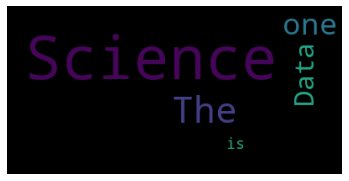

In [4]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = dict([ ('The',20),('Data',100),('Science',888),('is',14),('one',132), ('The',200) ])

wordcloud = WordCloud(max_words=10)

wordcloud.generate_from_frequencies(data)

plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

c) Eliminar as stopwords do resultado do item b) e verificar quais são os 20 tokens mais frequentes no resultado. Faça um gráfico (histograma, gráfico de frequências ou até mesmo uma nuvem de palavras) mostrando o resultado.



d) Realizar a lematização dos resultados dos itens b) e c). Verificar quais são os 20 tokens mais frequentes em cada caso e fazer os respectivos gráficos (histograma, gráfico de frequências ou até mesmo uma nuvem de palavras).



e) Repita o item d) realizando o stemming ao invés da lematização.

**IMPORTANTE**:


---

>
>


A **Atividade Prática 01** deve ser feita usando o **Google Colab** com uma conta sua vinculada ao Gmail. O link do seu notebook, armazenado no Google Drive, deve ser enviado usando o seguinte formulário:

> https://forms.gle/qUYsTSdawh3CCA5J8

A submissão deve ser feita até o dia **12/10/2021** (terça-feira - até às 23h59). Por favor, lembre-se de dar permissão de ACESSO IRRESTRITO.

# Resolution

### Import libraries

In [5]:
import requests
from bs4 import BeautifulSoup 
import re
import nltk
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

### Configuration and download data NLTK

In [6]:
nltk.download('stopwords')
nltk.download("punkt")
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### Download and extract text

In [7]:
url = 'https://www.ft.com/content/19d90308-6858-11ea-a3c9-1fe6fedcca75'
page = requests.get(url)

soup = BeautifulSoup(page.content,"lxml")
texts = soup.findAll(attrs={'class': "article__content-body n-content-body js-article__content-body"})

text_extracted=''.join([text_value.get_text().strip() for text_value in texts])

text_extracted = re.compile(r"\s+").sub(" ", text_extracted.replace("\xa0"," ").replace("\t","").replace("\n"," ").replace("\n"," ")).strip()

print(f"[INFO] Text: {text_extracted[:100]}...")

[INFO] Text: Humankind is now facing a global crisis. Perhaps the biggest crisis of our generation. The decisions...


### Tokenize text (not applying the stop words)

In [8]:
tokenizer = RegexpTokenizer(r"\w+")
text_tokenized = [word for word in tokenizer.tokenize(text_extracted) if word.isalnum()] 

print(f"[INFO] Size text tokenized {len(text_tokenized)}.")

[INFO] Size text tokenized 6171.


### Functions to helper

In [9]:
def get_word_frequency(text_value):

    word_frequency = Counter(" ".join(text_value).split()).most_common(20)
    words = [word for word, _ in word_frequency]
    counts = [counts for _, counts in word_frequency]

    return word_frequency, words, counts

In [10]:
def bar_plot_chart(words, counts):
    plt.figure(figsize=(20, 6), dpi=80)
    plt.bar(words, counts,color='#207143')
    plt.title('\n20 most frequent tokens in "Yuval Noah Harari: the world after coronavirus"\n')
    plt.ylabel("Frequency")
    plt.xlabel("Words")
    plt.xticks(rotation=45)
    plt.show()

In [11]:
def random_color_func(word=None, font_size=None, position=None, orientation=None, font_path=None, random_state=None):
    # rgb(32,113,67)
    # hsl (146, 56, 28)

    h = int(146)
    s = int(56)
    l = int(28 * (random_state.randint(10, 300)) / 255.0)

    return "hsl({}, {}%, {}%)".format(h, s, l)

In [12]:
def wordcloud_plot_chart(word_frequency):
    wordcloud = WordCloud(
        color_func=random_color_func,
        background_color = 'white',
        max_words=20,
        stopwords = None,
    )

    wordcloud.generate_from_frequencies(dict(word_frequency))

    plt.figure(figsize = (10, 10),dpi=100)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

### Processing text (not applying the stop words)

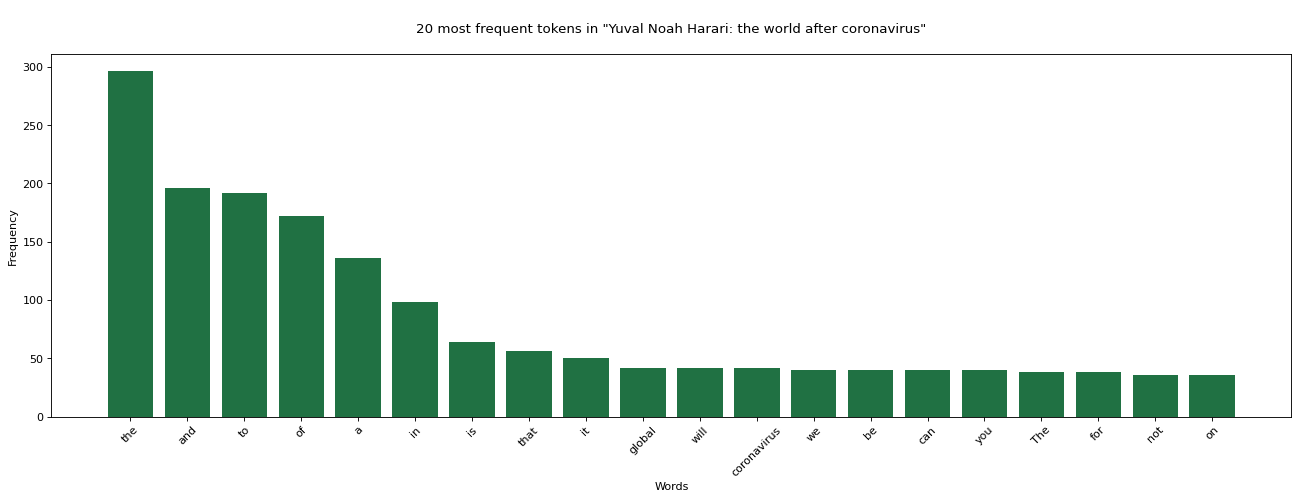

In [13]:
word_frequency, words, counts = get_word_frequency(text_tokenized)
bar_plot_chart(words, counts)

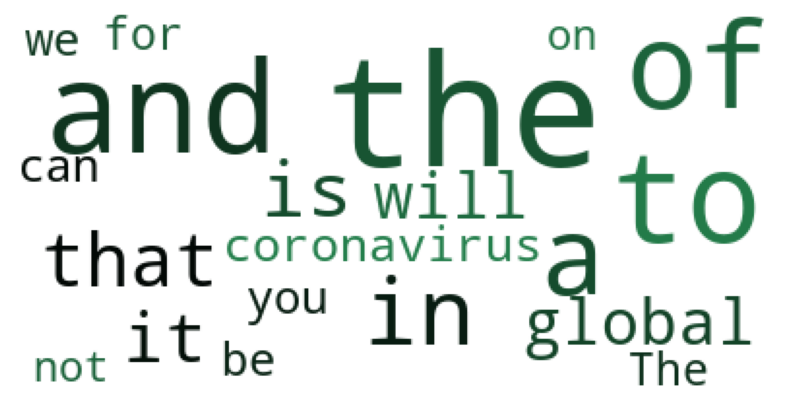

In [14]:
wordcloud_plot_chart(word_frequency)

### Processing text (**applying** the stop words)

In [15]:
text_tokenized_stopwords = [w for w in text_tokenized if  w.lower() not in stop_words]
 
print(f"[INFO] Size text tokenized with stop_words: {len(text_tokenized_stopwords)} ({(100*len(text_tokenized_stopwords)/len(text_tokenized)):.1f}%).")

[INFO] Size text tokenized with stop_words: 3421 (55.4%).


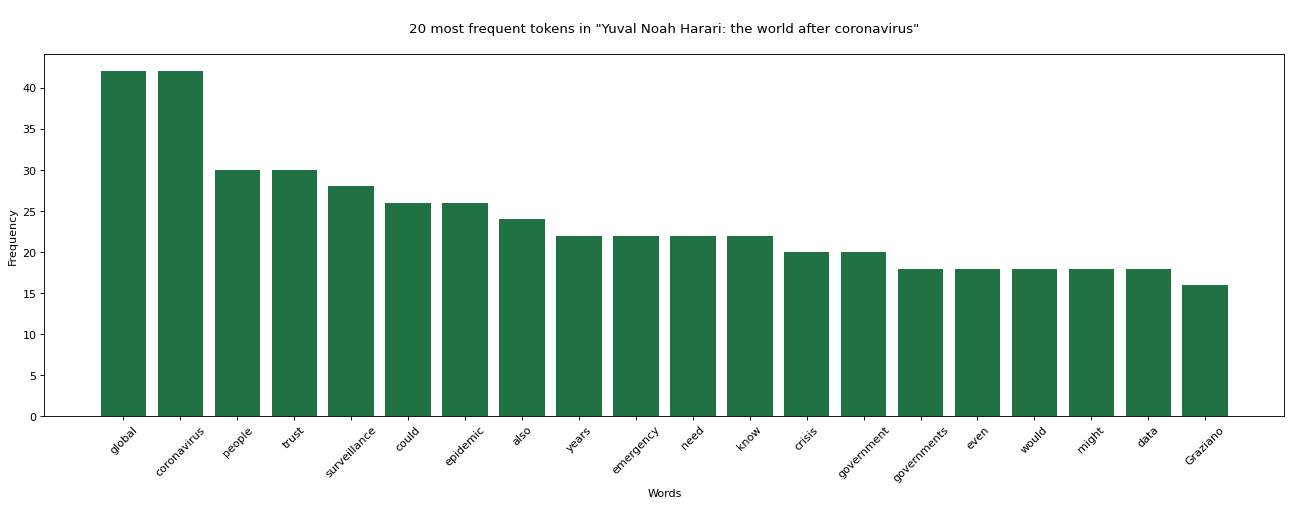

In [16]:
word_frequency_stopwords, words_stopwords, counts_stopwords = get_word_frequency(text_tokenized_stopwords)
bar_plot_chart(words_stopwords, counts_stopwords)

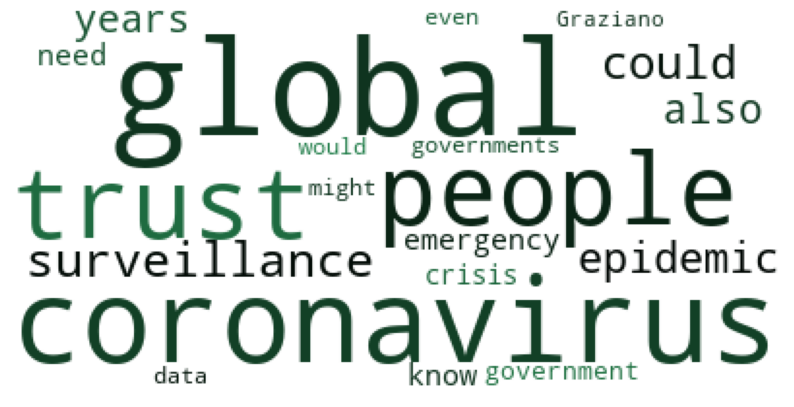

In [17]:
wordcloud_plot_chart(word_frequency_stopwords)

### Processing text (**applying** the stop words and lemmatizer)

In [18]:
lemmatizer = WordNetLemmatizer()
text_tokenized_lemmatized = [lemmatizer.lemmatize(w) for w in text_tokenized_stopwords] 
print(f"[INFO] Size text lemmatized with stop_words: {len(text_tokenized_lemmatized)} ({(100*len(text_tokenized_lemmatized)/len(text_tokenized)):.1f}%).")

[INFO] Size text lemmatized with stop_words: 3421 (55.4%).


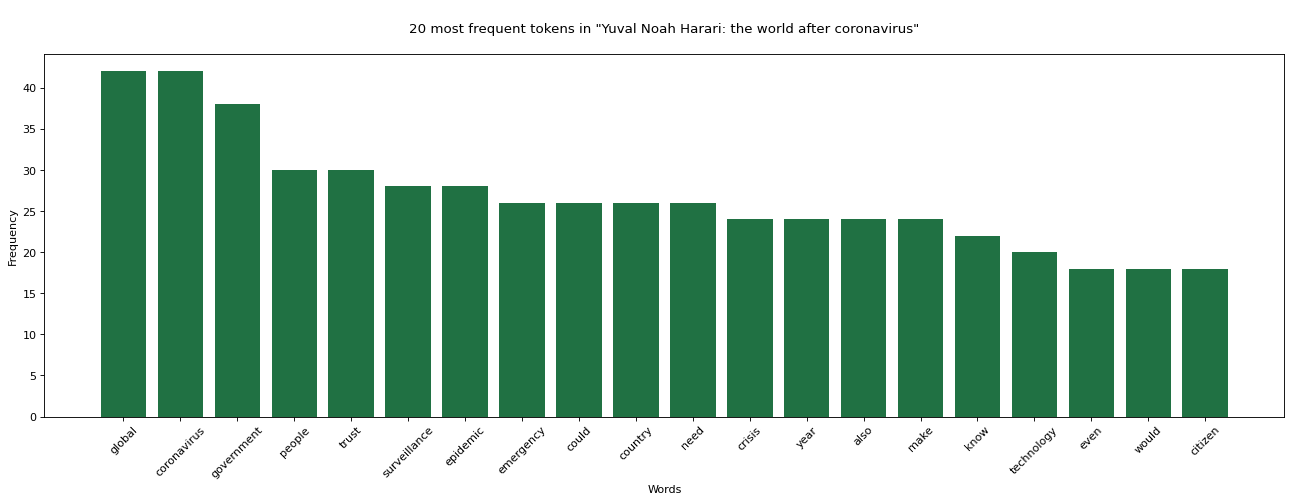

In [19]:
word_frequency_lemmatized, words_lemmatized, counts_lemmatized = get_word_frequency(text_tokenized_lemmatized)
bar_plot_chart(words_lemmatized, counts_lemmatized)

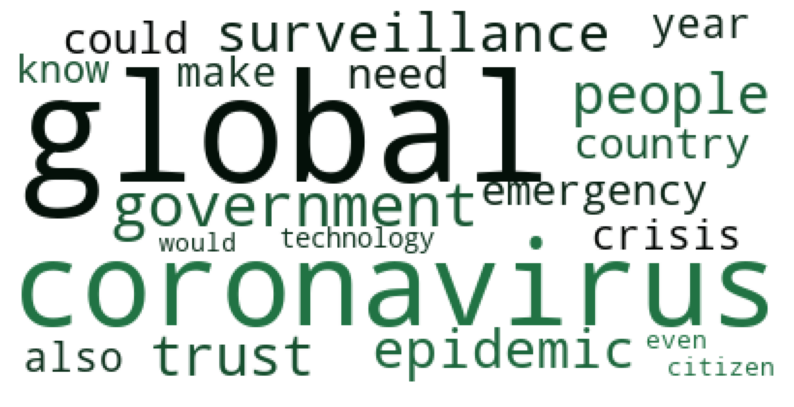

In [20]:
wordcloud_plot_chart(word_frequency_lemmatized)

### Processing text (**applying** the stop words and Stemmer)

In [21]:
stemmer = PorterStemmer()
text_tokenized_stemmed = [stemmer.stem(w) for w in text_tokenized_stopwords] 
print(f"[INFO] Size text stemmed with stop_words: {len(text_tokenized_stemmed)} ({(100*len(text_tokenized_stemmed)/len(text_tokenized)):.1f}%).")

[INFO] Size text stemmed with stop_words: 3421 (55.4%).


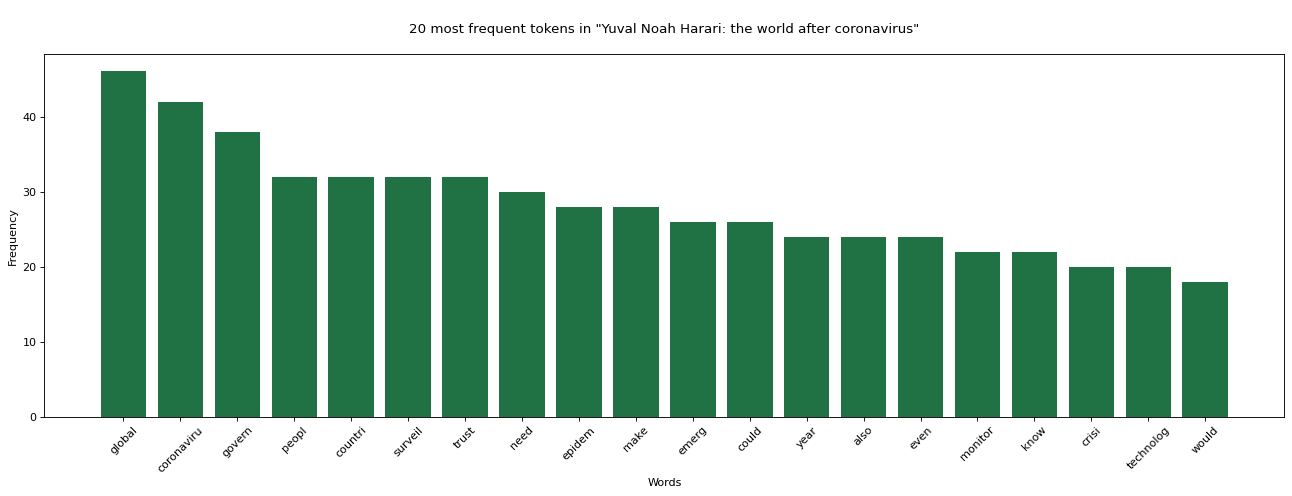

In [22]:
word_frequency_stemmed, words_stemmed, counts_stemmed = get_word_frequency(text_tokenized_stemmed)
bar_plot_chart(words_stemmed, counts_stemmed)

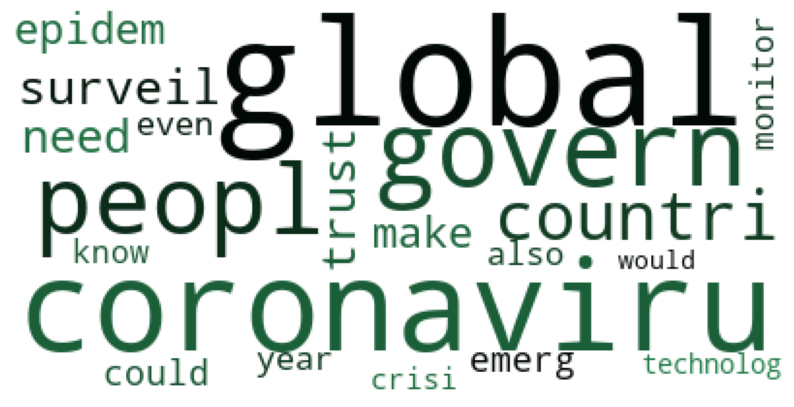

In [23]:
wordcloud_plot_chart(word_frequency_stemmed)